In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

AvWvf
AvWvf_Center_Peak
AvWvf_Center_Rise


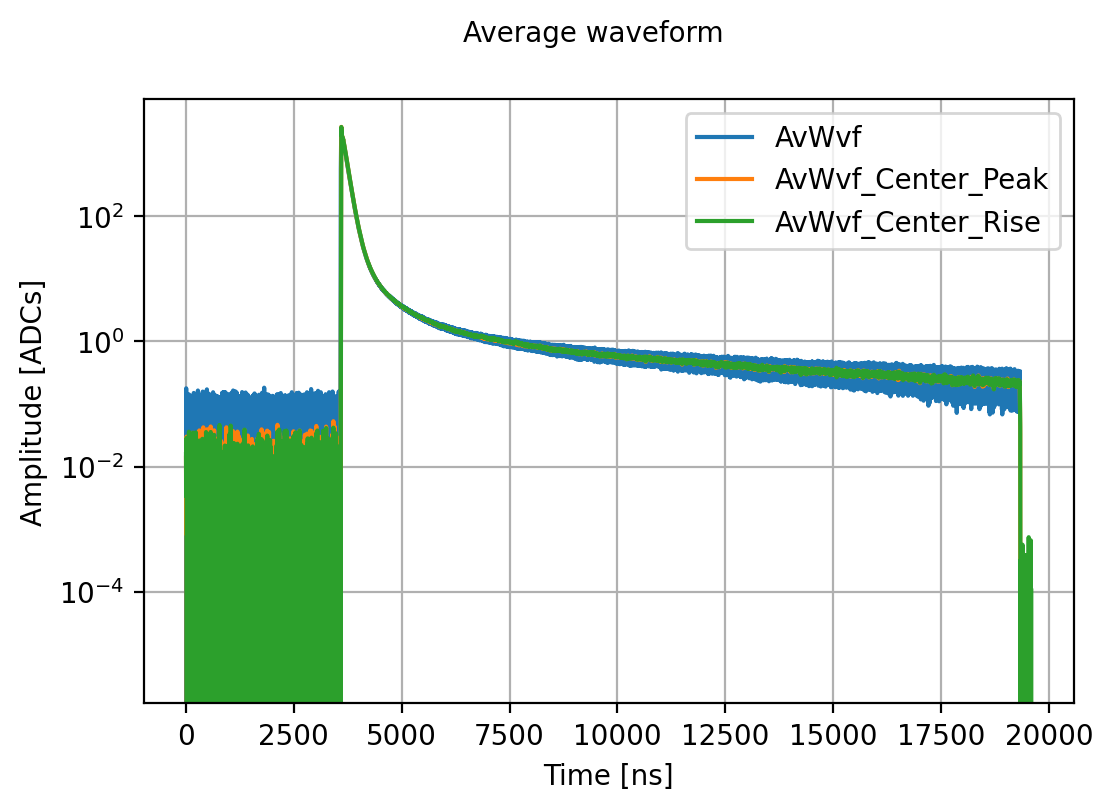

In [7]:

%matplotlib inline
# WEEK="APSAIA_VIS"   # 1st  week 
# WEEK="APSAIA_VUV"   # 2nd  week 
WEEK="DAPHNE_VIS"   # 3rd  week 
# WEEK="DAPHNE_VUV"   # 4th  week 
# WEEK="APSAIA_VUV_2" # 5th  week 
path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
Runs=Runs[Runs["Run"]==28]

SAMPLING=4 #ns
for run in Runs["Run"].array:
    Run_props=Runs[Runs["Run"]==run].iloc[0]
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    
    for ch in [0]:

        Avg_wvf=open_run_var(run_path,"Avg_wvf",[ch],compressed=compress)
        plt.figure(dpi=200)
        for alg in Avg_wvf[ch]:
            print (alg)
            # if alg=="AvWvf":
            if 1:
                wvf=Avg_wvf[ch][alg]
                
                center_bin=np.argmax(wvf)
                wvf=wvf[center_bin-900:]
                
                NBINS=wvf.shape[0]
                xrange=np.arange(NBINS)*SAMPLING
                plt.plot(xrange,wvf,label=alg)
        plt.ylabel("Amplitude [ADCs]")
        plt.xlabel("Time [ns]")
        plt.suptitle("Average waveform",fontsize=10)
        plt.grid()
        # plt.xlim(3e3,4.5e3)
    plt.legend()
plt.semilogy()
plt.show()
